## Part I: Importing Packages

In [79]:
!pip install plotly
!pip install chart_studio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import seaborn as sns

sns.set_style('whitegrid')
sns.color_palette("Set2")
plt.figure(figsize = (25,20))


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/telco-cust/Telco-Customer-Churn_111223.xlsx


<Figure size 2500x2000 with 0 Axes>

## Part II: Pre-processing and EDA

In [80]:
df = pd.read_excel('/kaggle/input/telco-cust/Telco-Customer-Churn_111223.xlsx')
df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [81]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
df.tail()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [83]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [85]:
target_col = 'Churn'
service_col = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
identity_col = ['Partner','Dependents','gender']
user_account_col = ['Contract','PaperlessBilling','PaymentMethod']

#checking unique values on service_col
for service in service_col:
  print("Kolom {} :".format(service))
  print(df[service].unique())
  print("")

Kolom PhoneService :
['No' 'Yes']

Kolom MultipleLines :
['No phone service' 'No' 'Yes']

Kolom InternetService :
['DSL' 'Fiber optic' 'No']

Kolom OnlineSecurity :
['No' 'Yes' 'No internet service']

Kolom OnlineBackup :
['Yes' 'No' 'No internet service']

Kolom DeviceProtection :
['No' 'Yes' 'No internet service']

Kolom TechSupport :
['No' 'Yes' 'No internet service']

Kolom StreamingTV :
['No' 'Yes' 'No internet service']

Kolom StreamingMovies :
['No' 'Yes' 'No internet service']



In [86]:
# Fixing class on MultipleLines column
label_mapping = {
    'No phone service': 0,
    'No internet service' : 0,
    'No': 0,
    'Yes': 1
}

# Replace labels using the mapping

df['PhoneService'] = df['PhoneService'].map(label_mapping)
df['MultipleLines'] = df['MultipleLines'].map(label_mapping)
df['OnlineSecurity'] = df['OnlineSecurity'].map(label_mapping)
df['OnlineBackup'] = df['OnlineBackup'].map(label_mapping)
df['DeviceProtection'] = df['DeviceProtection'].map(label_mapping)
df['TechSupport'] = df['TechSupport'].map(label_mapping)
df['StreamingTV'] = df['StreamingTV'].map(label_mapping)
df['StreamingMovies'] = df['StreamingMovies'].map(label_mapping)

In [87]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,0,0,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
df.tail()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,1,1,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,1,1,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,1,0,Fiber optic,1,0,1,1,1,1,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [89]:
df.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [90]:
# Changing TotalCharge data type and making sure it gots the right value
df['TotalCharges'] = '0'
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'] = df['Tenure']*df['MonthlyCharges']

In [91]:
#copying data into new data
data = df

In [92]:
data

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1936.30,No
2,Male,0,No,No,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,Male,0,No,No,45,0,0,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,Female,0,No,No,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,141.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,1,1,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,84.80,2035.20,No
7039,Female,0,Yes,Yes,72,1,1,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7430.40,No
7040,Female,0,Yes,Yes,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,325.60,No
7041,Male,1,Yes,No,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,297.60,Yes


In [93]:
#Performing One Hot Encoding into several columns to get new features
col_to_convert = ['Gender', 'InternetService', 'Contract', 'PaymentMethod']
data = pd.get_dummies(data, columns = col_to_convert, dtype=int)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   object 
 2   Dependents                               7043 non-null   object 
 3   Tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

In [95]:
#converting InternetService into int first to sum the service_count
to_int = ['InternetService_DSL','InternetService_Fiber optic','InternetService_No']
data[to_int] = data[to_int].astype(int)


target_col = 'Churn'
service_col = ['PhoneService','MultipleLines','InternetService_DSL','InternetService_Fiber optic','InternetService_No','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
identity_col = ['Partner','Dependents','Gender_Female', 'Gender_Male', 'Senior_Citizen']
user_account_col = ['Contract_Month-to-month','Contract_One year', 'Contract_Two year','PaperlessBilling','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

data['service_count'] = data[service_col].sum(axis=1)
data

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,service_count
0,0,Yes,No,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,2
1,0,No,No,34,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,4
2,0,No,No,2,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,4
3,0,No,No,45,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,4
4,0,No,No,2,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,1,1,1,0,1,1,...,0,0,0,1,0,0,0,0,1,8
7039,0,Yes,Yes,72,1,1,0,1,1,0,...,1,0,0,1,0,0,1,0,0,7
7040,0,Yes,Yes,11,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,2
7041,1,Yes,No,4,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,3


In [96]:
data['service_count']

0       2
1       4
2       4
3       4
4       2
       ..
7038    8
7039    7
7040    2
7041    3
7042    7
Name: service_count, Length: 7043, dtype: int64

<Axes: xlabel='Churn', ylabel='Tenure'>

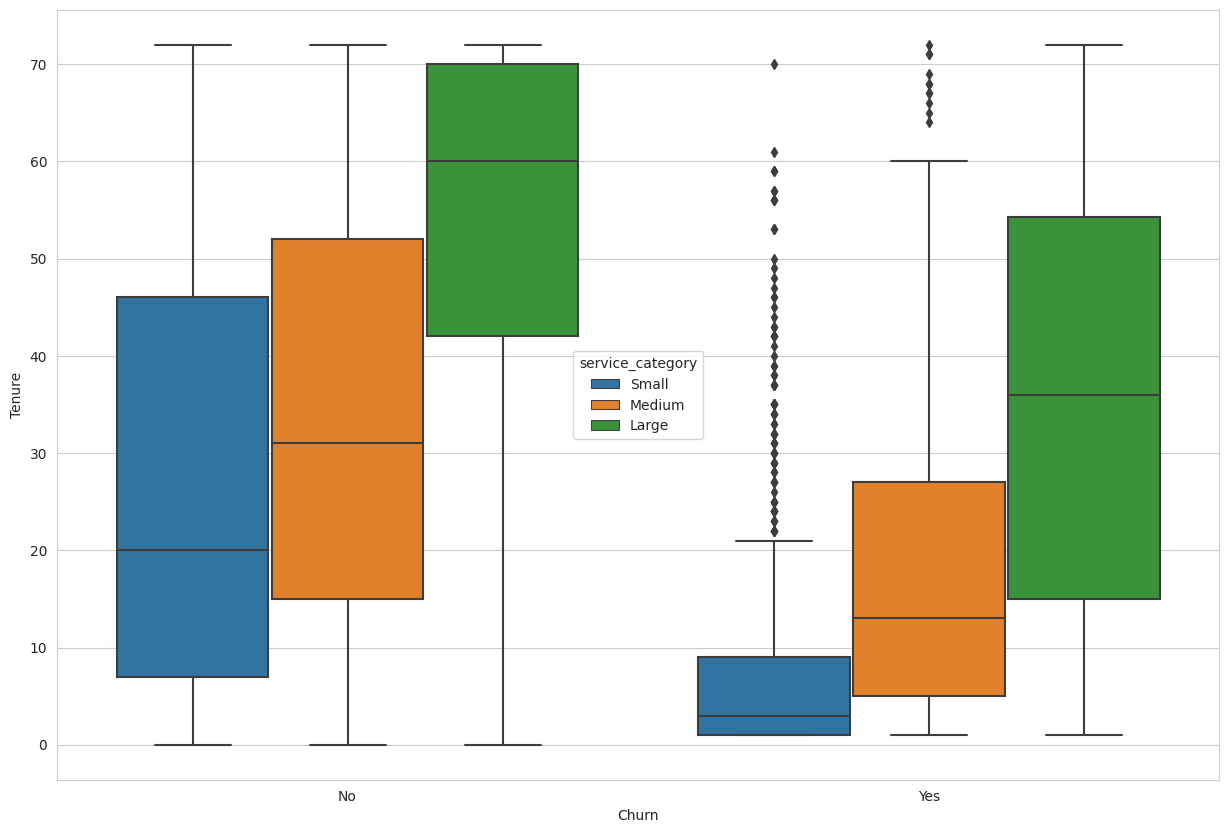

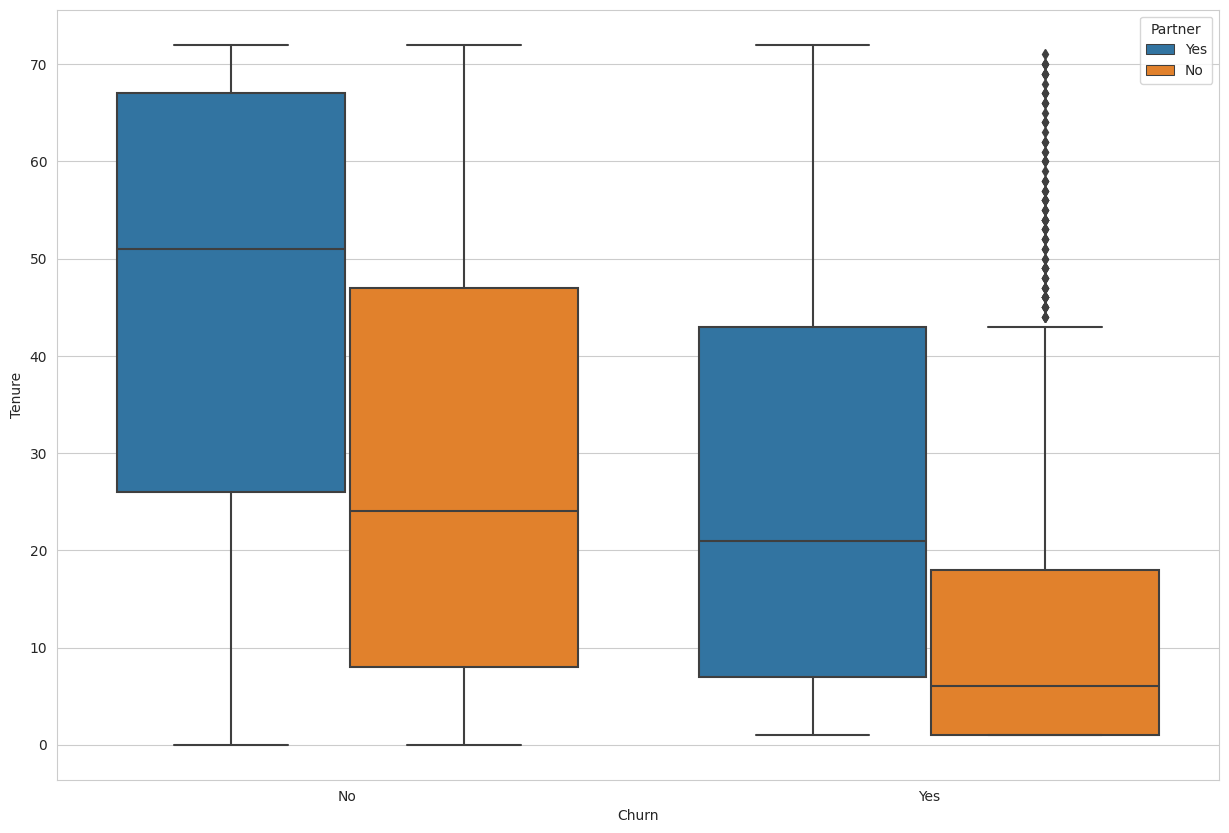

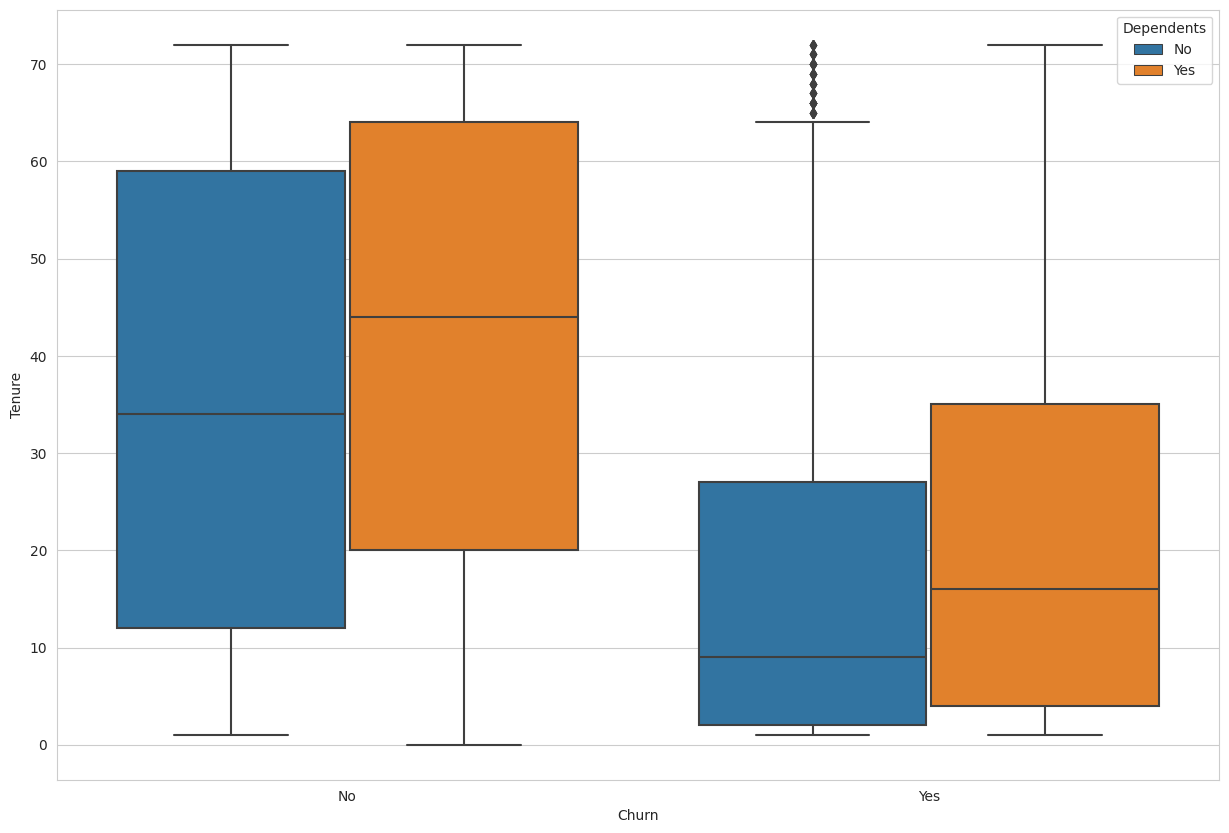

In [97]:
data['service_category'] = pd.qcut(data['service_count'],3, labels = ['Small','Medium','Large'])

plt.figure(figsize = (15,10))
sns.boxplot(x='Churn',y='Tenure',hue = 'service_category', data = data)

plt.figure(figsize=(15,10))
sns.boxplot(x='Churn',y='Tenure',hue='Partner',data=data)

plt.figure(figsize=(15,10))
sns.boxplot(x='Churn',y='Tenure',hue='Dependents',data=data)

It turns out that the amount of customer service affects the length of time a customer will continue to provide service or not, customers who have little service have a lower mean tenure whether they churn or not compared to customers who have a lot or moderate service. Customers who have many services tend to have longer tenure than others, whether they churn or not

Also note that there are many outliers in customers who churn and have little service, which means that even though the customer has little service, their tenure in the service is long until the customer eventually churns.

### Do customers with partners/dependents tend to continue service?

Sometimes, if we are unfamiliar with what services to use, we often ask our colleagues or our parents about what services we should take. This can certainly influence our decision to continue using the service or not (although because we are laypeople, sometimes we might try new services).

On the other hand, if the customer is dependent, there is a tendency for the tenure time to be longer compared to those who are not.

So what about those who have partners and are also dependent? To get it, we have to add a new column regarding True/False, the customer has a partner and is dependent

<Axes: xlabel='Churn', ylabel='Tenure'>

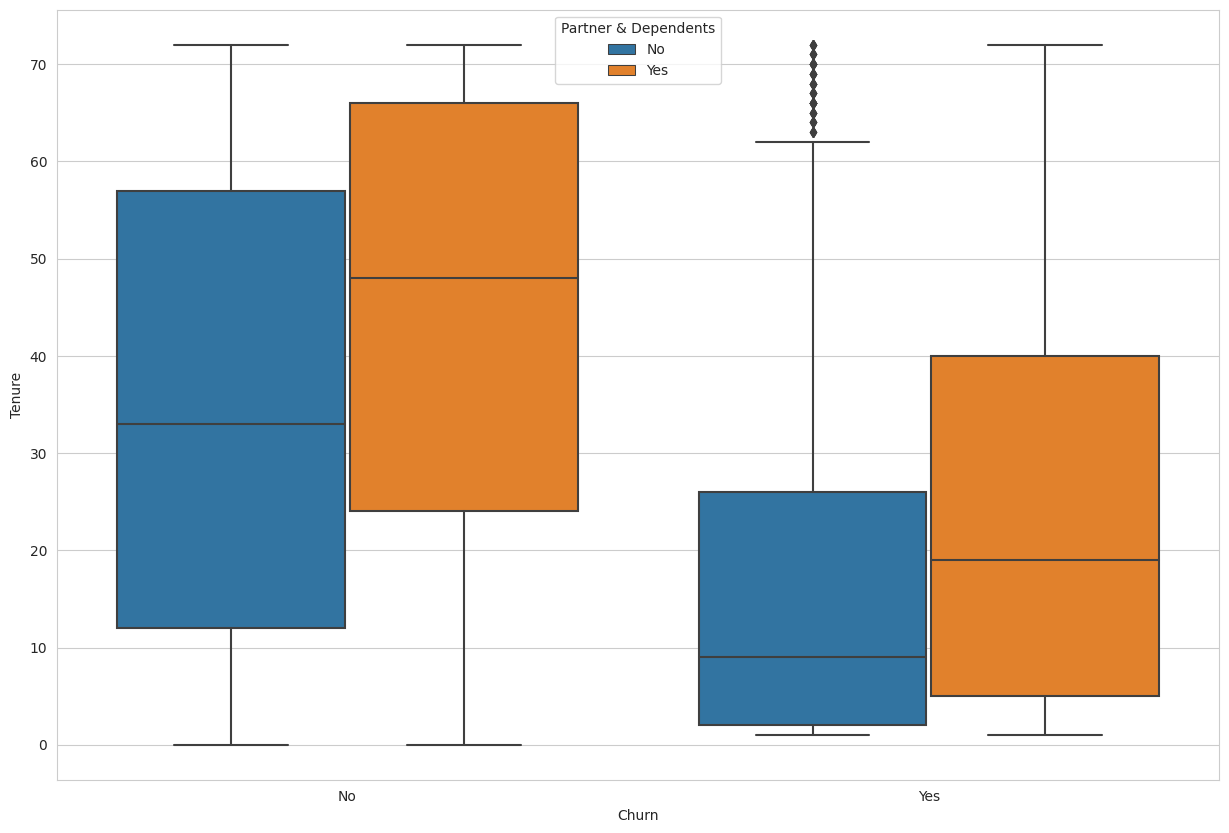

In [98]:
data['Partner & Dependents'] = (
    (data['Partner'] == 'Yes') & (data['Dependents'] == 'Yes')
).map({True: 'Yes', False: 'No'})

plt.figure(figsize=(15,10))
sns.boxplot(x='Churn',y='Tenure',hue='Partner & Dependents',data=data)

It turns out that if the customer has a partner and is dependent, there is a tendency for the customer's tenure to be longer compared to those who have one or neither. Then, the tenure time for customers who churn is lower compared to those who don't churn.

### Do customers with high service costs tend to have longer tenure times?

Sometimes having large costs makes us consider continuing to subscribe to the service, especially if there are other companies that offer cheaper services, so we are more willing to decide on our current service. So, does the same trend also apply to this data? Let's observe

Let's look at the customer TotalCharge large cumulative distributive function with the plot

<Axes: xlabel='TotalCharges', ylabel='Density'>

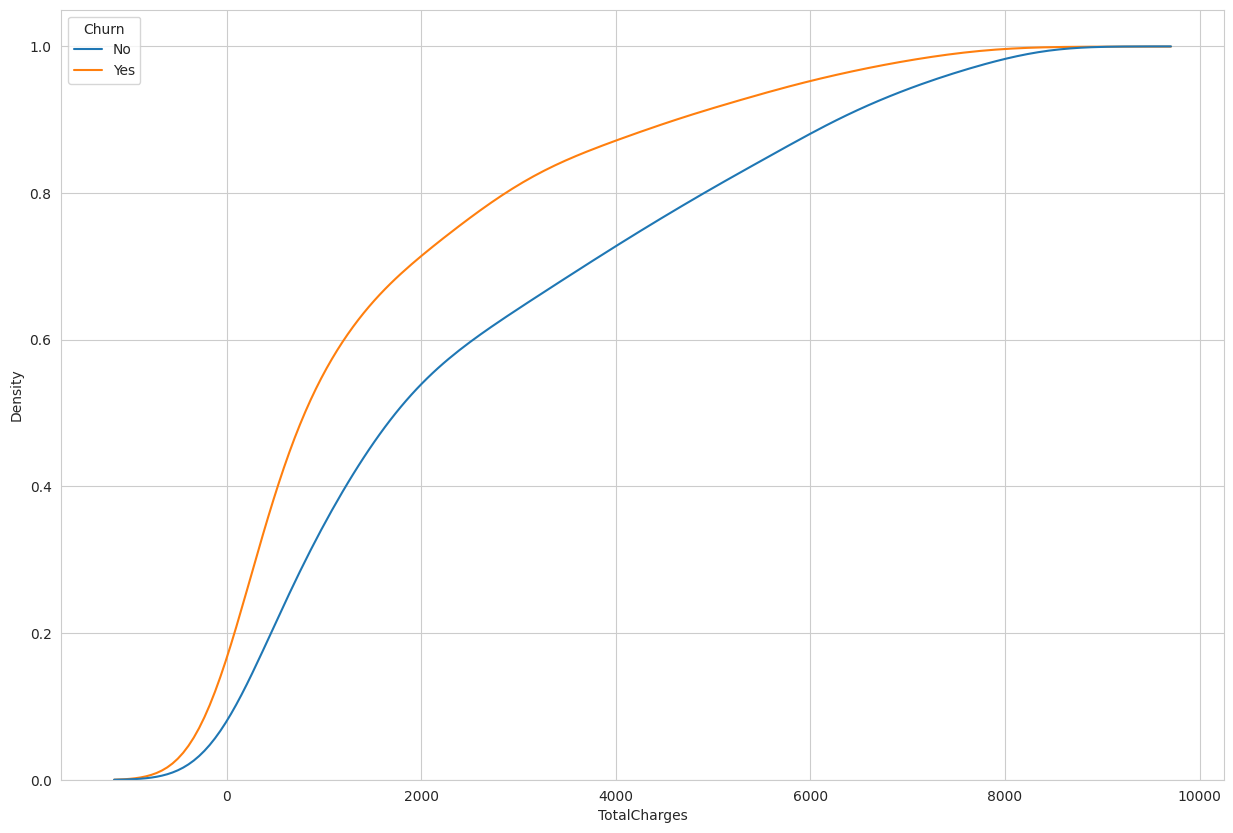

In [99]:
plt.figure(figsize = (15,10))
sns.kdeplot(data = data, x = 'TotalCharges', hue = 'Churn',cumulative=True, common_norm=False, common_grid=True)

There are 50% of non-churn customers who have a total cost of less than $\$$ 2000 while there are around 65% of churned customers who have a total cost of less than $\$$ 2000. Here there is a tendency that there is a higher opportunity for certain costs for customers who churn compared to those who do not (This is because the number of customers who churn is less than those who do not, resulting in the opportunity for customers who churn compared to those who do not).

Now we want to see a boxplot of total charge taking into account customers who churn and those who don't

In [100]:
data['TotalCharges'].describe()
data['TotalCharges_cat'] = pd.qcut(data['TotalCharges'], q = 4)

From here you can see the first, second and third quartiles as well as the maximum value of TotalCharge. Then, create 1 additional feature to categorize each customer's TotalCharge

<Axes: xlabel='Churn', ylabel='Tenure'>

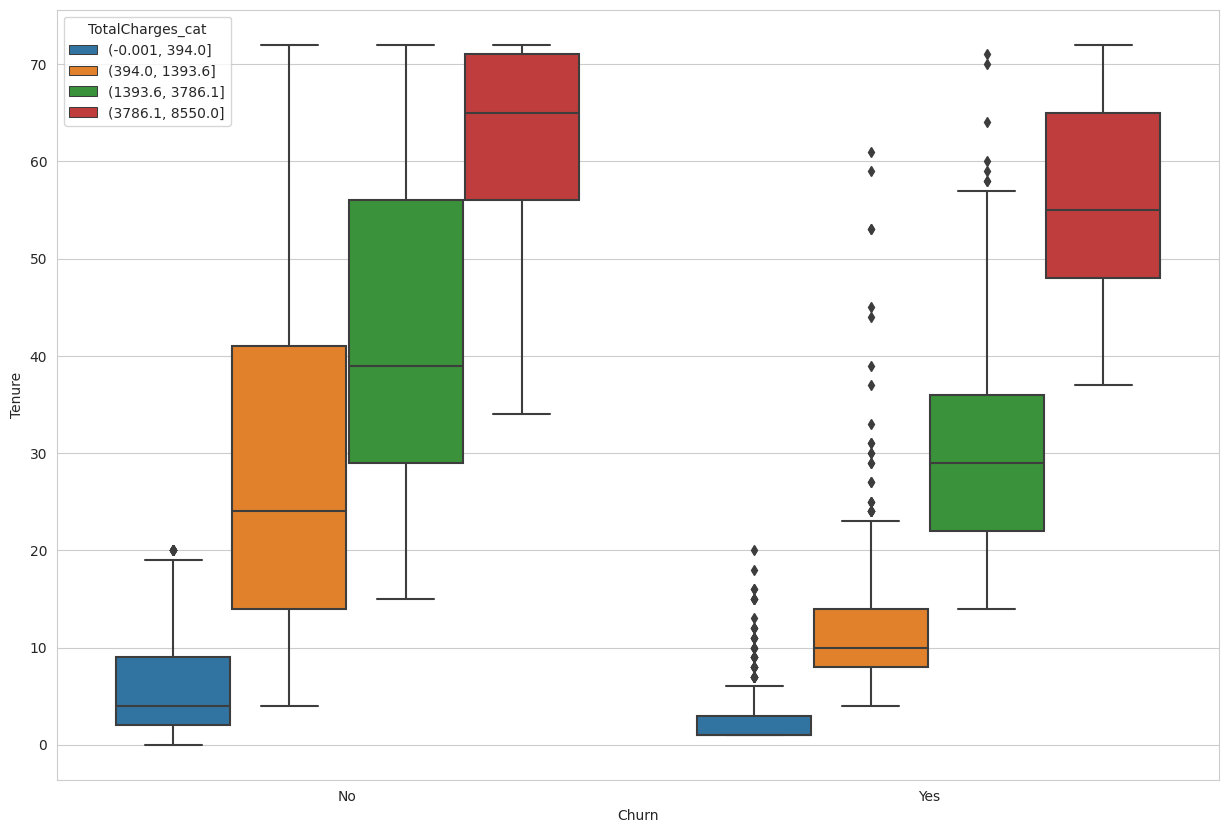

In [101]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Churn',y='Tenure',hue='TotalCharges_cat',data=data)

Looking at the trends from the two previous boxplots, it turns out that customers with costs between $\$$3786 and $\$$8550 have the longest tenure time compared to the others. Then, customers with lower costs tend to have shorter tenure times

### Which features have an impact on *customer churn*?

#### Correlation between other Features and Churn
Here we will determine the correlation between other features and the Churn feature which will be the target/which will be predicted in the Machine Learning model that we will create. First of all, we need to change the columns with object data types to numeric so that we can create a scatter plot visualization along with the magnitude of the correlation.

In [102]:
data.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,service_count,service_category,Partner & Dependents,TotalCharges_cat
0,0,Yes,No,1,0,0,0,1,0,0,...,0,0,0,0,1,0,2,Small,No,"(-0.001, 394.0]"
1,0,No,No,34,1,0,1,0,1,0,...,1,0,0,0,0,1,4,Medium,No,"(1393.6, 3786.1]"
2,0,No,No,2,1,0,1,1,0,0,...,0,0,0,0,0,1,4,Medium,No,"(-0.001, 394.0]"
3,0,No,No,45,0,0,1,0,1,1,...,1,0,1,0,0,0,4,Medium,No,"(1393.6, 3786.1]"
4,0,No,No,2,1,0,0,0,0,0,...,0,0,0,0,1,0,2,Small,No,"(-0.001, 394.0]"


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   SeniorCitizen                            7043 non-null   int64   
 1   Partner                                  7043 non-null   object  
 2   Dependents                               7043 non-null   object  
 3   Tenure                                   7043 non-null   int64   
 4   PhoneService                             7043 non-null   int64   
 5   MultipleLines                            7043 non-null   int64   
 6   OnlineSecurity                           7043 non-null   int64   
 7   OnlineBackup                             7043 non-null   int64   
 8   DeviceProtection                         7043 non-null   int64   
 9   TechSupport                              7043 non-null   int64   
 10  StreamingTV                         

In [104]:
# Fixing class on MultipleLines column
label_mapping = {
    'No': 0,
    'Yes': 1
}

data['Partner'] = data['Partner'].map(label_mapping)
data['Dependents'] = data['Dependents'].map(label_mapping)
data['PaperlessBilling'] = data['PaperlessBilling'].map(label_mapping)
data['Churn'] = data['Churn'].map(label_mapping)
data['Partner & Dependents'] = data['Partner & Dependents'].map(label_mapping)
data



,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,service_count,service_category,Partner & Dependents,TotalCharges_cat
0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,2,Small,0,"(-0.001, 394.0]"
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,0,1,4,Medium,0,"(1393.6, 3786.1]"
2,0,0,0,2,1,0,1,1,0,0,...,0,0,0,0,0,1,4,Medium,0,"(-0.001, 394.0]"
3,0,0,0,45,0,0,1,0,1,1,...,1,0,1,0,0,0,4,Medium,0,"(1393.6, 3786.1]"
4,0,0,0,2,1,0,0,0,0,0,...,0,0,0,0,1,0,2,Small,0,"(-0.001, 394.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1,0,0,0,0,1,8,Large,1,"(1393.6, 3786.1]"
7039,0,1,1,72,1,1,0,1,1,0,...,1,0,0,1,0,0,7,Large,1,"(3786.1, 8550.0]"
7040,0,1,1,11,0,0,1,0,0,0,...,0,0,0,0,1,0,2,Small,1,"(-0.001, 394.0]"
7041,1,1,0,4,1,1,0,0,0,0,...,0,0,0,0,0,1,3,Small,0,"(-0.001, 394.0]"


In [105]:
#Dropping Unused columns
data.drop(columns=['TotalCharges_cat','service_category','Partner & Dependents'],axis = 1,inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   Tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

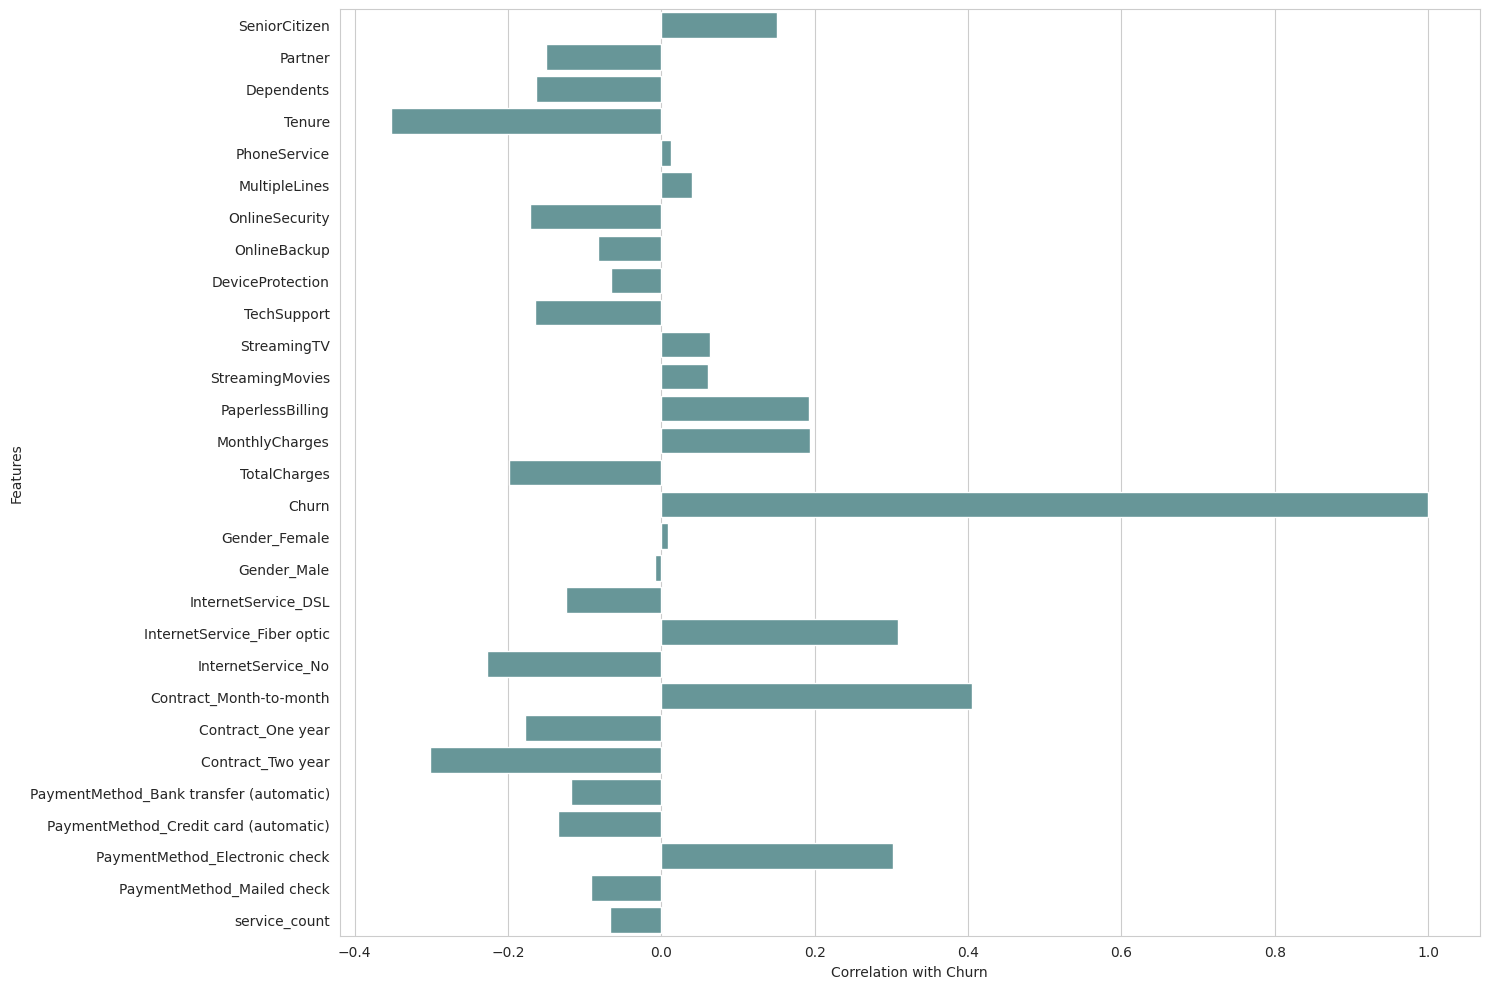

In [106]:
# Hitung korelasi antar fitur
corr = data.corr()
col = np.array(corr.columns)

# Buat visualisasi bar plot
fig, ax = plt.subplots(figsize=(15,10), tight_layout=True)
sns.barplot(x = corr['Churn'], y = col, color = 'cadetblue')
plt.xlabel('Correlation with Churn')
plt.ylabel('Features')
plt.show()

It can be observed that the features 'Contract Month to Month' and 'PaymentMethod_Electronic check' are positively correlated with Churn significantly. Meanwhile the features 'Tenure', 'Contract_two_year' are negatively correlated with Churn. Other features such as 'MonthlyCharges', 'StramingMovies' and other services also have a positive or negative correlation with the Churn column.

From here the most impactful features are obtained from the payment method, length of contract period and followed by other services.

## Part III: Machine Learning

Here we will use Machine Learning methods, namely KNeighborsClassifiers, Logistic Regression, SVM, Random Forest, Adaboost and XGB Classifier to test which of the four produces the best performance in predicting labels.

#### Features and Labels

##### All Identity Features, Facilities, User Accounts
Here we will use the numeric data that we have processed previously but we need to change the dtype of the object column to a numeric column

In [107]:
data_train = data
data_train.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,service_count
0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,2
1,0,0,0,34,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,4
2,0,0,0,2,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,4
3,0,0,0,45,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,4
4,0,0,0,2,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,2


In [108]:
X = data_train.drop(columns=['Churn'])
y = data_train['Churn']

# Print Shape
print('Shape Feature Columns: ',X.shape)
print('Shape Target Columns: ', y.shape)

Shape Feature Columns:  (7043, 28)
Shape Target Columns:  (7043,)


#### Training-Test Dataset

A test size of 0.3 will be used and a training size of 0.7

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Splitting X dan y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 672)

# Print Shape
print('Shape X_train: ',X_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape X_test: ', X_test.shape)
print('Shape y_test: ', y_test.shape)


Shape X_train:  (4930, 28)
Shape y_train:  (4930,)
Shape X_test:  (2113, 28)
Shape y_test:  (2113,)


#### Using The Classifiers

First, functions will be created to calculate accuracy, precision, f1_score and recall

In [110]:
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb
from xgboost import XGBClassifier
models = XGBClassifier()
models.fit(X_train,y_train)
y_pred = models.predict(X_test)
mat = confusion_matrix(y_test,y_pred)

mat[0][0]
print(mat)

[[1356  188]
 [ 285  284]]


In [111]:
def accuracy(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai akurasi dari prediksi model ML '''
  # Definisikan variabel 
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung accuracy score
  accuracy = (true_positive + true_negative)/(true_positive + true_negative + false_positive + false_negative)
  
  return accuracy

def precision(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai precision dari prediksi model ML '''
   # Definisikan variabel 
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung precision score
  precision = (true_positive)/(true_positive + false_positive)
  
  return precision

def recall(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai recall dari prediksi model ML '''

   # Definisikan variabel 
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Hitung recall score
  recall = (true_positive)/(true_positive + true_negative)

  return recall

def f1(conf_matrix):
  ''' Fungsi ini digunakan untuk menentukan nilai f1 dari prediksi model ML '''

  # Hitung recall score
  f1 = 2- ((precision(conf_matrix)*recall(conf_matrix))/(precision(conf_matrix) + recall(conf_matrix)))

  return f1

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#Create a list of classifiers
classifiers = [DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42), SVC(random_state=42), 
               GaussianNB(), KNeighborsClassifier(), BaggingClassifier(estimator=dt_classifier, random_state=42),
               AdaBoostClassifier(estimator=dt_classifier, random_state=42), 
               StackingClassifier(estimators=[('dt', dt_classifier), ('rf', rf_classifier), ('svc', svc_classifier)], final_estimator=LogisticRegression(), stack_method='auto', passthrough=False, cv=5),
               KNeighborsClassifier()]



# Buat array yang akan diisi oleh skor masing-masing model classifier
training_accuracy = []
testing_accuracy = []
accuracy_score = []
precision_score = []
recall_score = []
f1_score = []

for i in range(len(classifiers)):
  model = classifiers[i]
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  conf_matrix = confusion_matrix(y_test,y_pred)

  # Tambahkan setiap skor ke array yang telah disediakan
  training_accuracy.append(model.score(X_train, y_train))
  testing_accuracy.append(model.score(X_test, y_test))

  accuracy_score.append(accuracy(conf_matrix))
  precision_score.append(precision(conf_matrix))
  recall_score.append(recall(conf_matrix))
  f1_score.append(f1(conf_matrix))


data_class = {'Model':['Decision Tree', 'Random Forest', 'Support Vector Classifier', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 
                       'Bagging Classifier (Decision Tree)', 'Adaboost Classifier (Decision Tree)','Stacking Classifier'], 'Training Accuracy':training_accuracy, 'Testing Accuracy':testing_accuracy, 
              'Accuracy Score':accuracy_score, 'Precision Score':precision_score, 'Recall Score':recall_score, 'F1 Score':f1_score}
data_class = pd.DataFrame(data_class)
data_class

,Model,Training Accuracy,Testing Accuracy,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Decision Tree,0.997972,0.734027,0.734027,0.818005,0.814313,1.591922
1,Random Forest,0.997972,0.790819,0.790819,0.827197,0.833633,1.584799
2,Support Vector Classifier,0.736308,0.730715,0.730715,0.730715,1.000000,1.577796
3,Random Forest,0.740162,0.759584,0.759584,0.913078,0.713396,1.599510
4,Naive Bayes,0.832657,0.759110,0.759110,0.812689,0.838529,1.587297
5,K-Nearest Neighbors,0.981744,0.771415,0.771415,0.811144,0.848466,1.585307
6,Bagging Classifier (Decision Tree),0.997972,0.724562,0.724562,0.812338,0.817113,1.592641
7,Adaboost Classifier (Decision Tree),0.996349,0.787506,0.787506,0.818129,0.846154,1.584047
8,Stacking Classifier,0.832657,0.759110,0.759110,0.812689,0.838529,1.587297


If you look, the highest training accuracy score was obtained with the Random Forest Classifier model at 99% while the testing accuracy reached 78.5%, which is very different from the training score. The concern is that the model experiences overfitting but by using feature engineering the model performance can be improved. The most stable ML model is using Logistic Regression, Adaboost Classifier or XGB Classifier because there is little difference between training scores and testing scores. If you look at the accuracy, precision and F1_score scores, Logistic Regression has the best performance.